In [183]:
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_excel('IDCLEAN.xlsx', header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
22,Botswana,Africa,2200000.0,English,NaN,Tswana,English,NaN,"Tswana, Kalanga, Kgalagadi, Shona, Tsarwa, Mbu...",NaN,...,NaN,NaN,NaN,0.07,0.72,NaN,NaN,NaN,NaN,0.21
87,Kazakhstan,Asia,19000000.0,"Kazakh, Russian",NaN,"Kazakh, Russian",Russian,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.26,0.70,NaN,NaN,0.04
51,Ecuador,South America,16000000.0,Spanish,"Quechua, Shuar",Spanish,Spanish,NaN,NaN,NaN,...,NaN,NaN,"Quechua, Shuar",0.74,0.10,NaN,NaN,NaN,NaN,0.16
38,Congo,Africa,5000000.0,French,NaN,NaN,French,NaN,"Lingala, Kikongo",NaN,...,NaN,NaN,NaN,0.33,0.20,NaN,0.02,NaN,NaN,0.45
32,Central African Republic,Africa,5600000.0,French,NaN,Ngbandi Creole,French,NaN,Ngbandi Creole,NaN,...,NaN,NaN,NaN,0.25,0.25,NaN,0.15,NaN,NaN,0.35
117,Myanmar,Asia,55000000.0,Burmese,NaN,Burmese,NaN,Burmese,NaN,NaN,...,NaN,NaN,NaN,0.01,0.05,NaN,0.04,0.01,0.88,0.01
60,"Former Yugoslav Republic of Macedonia, The",Europe,2100000.0,Macedonian,"Albanian, Turkish, Romani, Aromanian, Serbo-Cr...",Macedonian,"Macedonian, Albanian, Romani, Serbo-Croatian",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.65,0.33,NaN,NaN,0.02
162,Sri Lanka,NaN,22000000.0,"Sinhalese, Tamil",NaN,Sinhalese,"Sinhalese, English",NaN,NaN,NaN,...,NaN,NaN,NaN,0.06,NaN,NaN,0.10,0.13,0.70,0.01
19,Bhutan,Asia,760000.0,Dzongkha,NaN,NaN,NaN,"Sharchhopka, Dzongkha, Lhotshamkha",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
21,Bosnia and Herzegovina,Europe,3900000.0,Serbo-Croatian,NaN,Serbo-Croatian,Serbo-Croatian,NaN,NaN,NaN,...,NaN,NaN,NaN,0.15,NaN,0.31,0.51,NaN,NaN,0.03


In [125]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Afghanistan,Asia,34000000.0,"Persian, Pashto","Uzbek, Turkmen, Balochi, Pashayi, Nuristani, P...",Persian,"Persian, Pashto, English, Urdu, Pashayi, Nuris...",NaN,NaN,Arabic,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.00
1,Albania,Europe,3000000.0,Albanian,NaN,Albanian,"Albanian, Greek",NaN,NaN,NaN,...,NaN,NaN,NaN,0.10,NaN,0.07,0.57,NaN,NaN,0.26
2,Algeria,Africa,41000000.0,"Arabic, Tamazight",NaN,French,French,NaN,NaN,"Arabic, Tamazight",...,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,0.01
3,Andorra,Europe,77000.0,Catalan,NaN,Catalan,"Catalan, French, Castilian, Portuguese",NaN,NaN,NaN,...,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00
4,Angola,Africa,29000000.0,Portuguese,NaN,Portuguese,Portuguese,NaN,"Umbundu, Kikongo, Kimbundu, Chokwe, Nhaneca, N...",NaN,...,NaN,NaN,NaN,0.41,0.38,NaN,NaN,NaN,NaN,0.21


In [126]:
data.columns = ['Country', 'Continent', 'Population', 'Official Languages',
               'Semi-Official Languages', 'Main Languages', 'Indo-European Languages',
               'Sino-Tibetan Languages', 'Niger-Congo Languages', 'Afro-Asiatic Languages',
               'Austronesian Languages', 'Dravidian Languages', 'Turkic Languages',
               'Japonic Languages', 'Austro-Asiatic Languages', 'Tai-Kadai Languages',
               'Koreanic Languages', 'Nilo-Saharan Languages', 'Uralic Languages',
               'Other Significant Languages', 'Percent Catholic', 'Percent Protestant',
               'Percent Orthodox', 'Percent Muslim', 'Percent Hindu', 'Percent Buddhist',
               'Percent Other Religions']

In [127]:
data

,Country,Continent,Population,Official Languages,Semi-Official Languages,Main Languages,Indo-European Languages,Sino-Tibetan Languages,Niger-Congo Languages,Afro-Asiatic Languages,...,Nilo-Saharan Languages,Uralic Languages,Other Significant Languages,Percent Catholic,Percent Protestant,Percent Orthodox,Percent Muslim,Percent Hindu,Percent Buddhist,Percent Other Religions
0,Afghanistan,Asia,34000000.0,"Persian, Pashto","Uzbek, Turkmen, Balochi, Pashayi, Nuristani, P...",Persian,"Persian, Pashto, English, Urdu, Pashayi, Nuris...",NaN,NaN,Arabic,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.00
1,Albania,Europe,3000000.0,Albanian,NaN,Albanian,"Albanian, Greek",NaN,NaN,NaN,...,NaN,NaN,NaN,0.10,NaN,0.07,0.57,NaN,NaN,0.26
2,Algeria,Africa,41000000.0,"Arabic, Tamazight",NaN,French,French,NaN,NaN,"Arabic, Tamazight",...,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,0.01
3,Andorra,Europe,77000.0,Catalan,NaN,Catalan,"Catalan, French, Castilian, Portuguese",NaN,NaN,NaN,...,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00
4,Angola,Africa,29000000.0,Portuguese,NaN,Portuguese,Portuguese,NaN,"Umbundu, Kikongo, Kimbundu, Chokwe, Nhaneca, N...",NaN,...,NaN,NaN,NaN,0.41,0.38,NaN,NaN,NaN,NaN,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,South America,31000000.0,Spanish,NaN,Spanish,Spanish,NaN,NaN,NaN,...,NaN,NaN,NaN,0.96,0.02,NaN,NaN,NaN,NaN,0.02
189,Viet Nam,Asia,96000000.0,Vietnamese,NaN,Vietnamese,"English, French",Mandarin,NaN,NaN,...,NaN,NaN,NaN,0.07,0.01,NaN,NaN,NaN,0.08,0.84
190,Yemen,Asia,28000000.0,Arabic,NaN,Arabic,NaN,NaN,NaN,"Arabic, Soqotri, Mahri",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
191,Zambia,Africa,16000000.0,English,NaN,NaN,English,NaN,"Bemba, Chewa, Tonga, Lozi, Senga, Tumbuka, Lun...",NaN,...,NaN,NaN,NaN,0.20,0.75,NaN,NaN,NaN,NaN,0.05


In [128]:
new_col = 2 * ['Indo-European']
new_col.append('Afro-Asiatic')
new_col.extend(7 * ['Indo-European'])
new_col.append('Turkic')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.extend(6 * ['Indo-European'])
new_col.append('Sino-Tibetan')
new_col.extend(4 * ['Indo-European'])
new_col.append('Austronesian')
new_col.extend(2 * ['Indo-European'])
new_col.append('Niger-Congo')
new_col.append('Indo-European')
new_col.append('Austroasiatic')
new_col.extend(3 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Sino-Tibetan')
new_col.append('Indo-European')
new_col.append('Niger-Congo')
new_col.extend(7 * ['Indo-European'])
new_col.append('Koreanic')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.extend(3 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.append('Austronesian')
new_col.append('Uralic')
new_col.extend(4 * ['Indo-European'])
new_col.append('Kartvelian')
new_col.extend(10 * ['Indo-European'])
new_col.append('Uralic')
new_col.extend(2 * ['Indo-European'])
new_col.append('Austronesian')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.extend(2 * ['Indo-European'])
new_col.append('Japonic')
new_col.append('Afro-Asiatic')
new_col.append('Turkic')
new_col.append('Niger-Congo')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.append('Turkic')
new_col.append('Kra-Dai')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.append('Niger-Congo')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.extend(3 * ['Indo-European'])
new_col.append('Austronesian')
new_col.append('Indo-European')
new_col.append('Austronesian')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Austronesian')
new_col.append('Afro-Asiatic')
new_col.extend(4 * ['Indo-European'])
new_col.append('Mongolic')
new_col.append('Indo-European')
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Sino-Tibetan')
new_col.append('Indo-European')
new_col.append('Austronesian')
new_col.extend(7 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Austronesian')
new_col.extend(4 * ['Indo-European'])
new_col.append('Austronesian')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Koreanic')
new_col.extend(3 * ['Indo-European'])
new_col.append('Niger-Congo')
new_col.extend(3 * ['Indo-European'])
new_col.append('Austronesian')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.extend(4 * ['Indo-European'])
new_col.append('Sino-Tibetan')
new_col.extend(3 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Niger-Congo')
new_col.extend(3 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Niger-Congo')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Kra-Dai')
new_col.append('Austronesian')
new_col.extend(3 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.extend(2 * ['Turkic'])
new_col.append('Austronesian')
new_col.extend(2 * ['Indo-European'])
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Niger-Congo')
new_col.extend(2 * ['Indo-European'])
new_col.append('Turkic')
new_col.extend(2 * ['Indo-European'])
new_col.append('Austroasiatic')
new_col.append('Afro-Asiatic')
new_col.append('Indo-European')
new_col.append('Niger-Congo')

In [129]:
data['Main Language Family'] = new_col

In [130]:
new_col_order = list(data.columns[:3])
new_col_order.append('Main Language Family')
new_col_order.extend(list(data.columns[3:-1]))
new_col_order

['Country',
 'Continent',
 'Population',
 'Main Language Family',
 'Official Languages',
 'Semi-Official Languages',
 'Main Languages',
 'Indo-European Languages',
 'Sino-Tibetan Languages',
 'Niger-Congo Languages',
 'Afro-Asiatic Languages',
 'Austronesian Languages',
 'Dravidian Languages',
 'Turkic Languages',
 'Japonic Languages',
 'Austro-Asiatic Languages',
 'Tai-Kadai Languages',
 'Koreanic Languages',
 'Nilo-Saharan Languages',
 'Uralic Languages',
 'Other Significant Languages',
 'Percent Catholic',
 'Percent Protestant',
 'Percent Orthodox',
 'Percent Muslim',
 'Percent Hindu',
 'Percent Buddhist',
 'Percent Other Religions']

In [131]:
data = data[new_col_order]

In [140]:
px.choropleth(locations=data['Country'],
              scope='world',
              color=data['Main Language Family'],
              locationmode='country names',
              width=900,
              height=400)

In [162]:
data['Continent'].value_counts(dropna=False)

Africa           47
NaN              45
Europe           38
Asia             34
South America    12
North America    10
Europe, Asia      5
Africa, Asia      1
Australia         1
Name: Continent, dtype: int64

In [163]:
asia = data[(data['Continent'] == 'Asia') | (data['Continent'] == 'Europe, Asia') |\
           (data['Continent'] == 'Africa, Asia')]

europe = data[(data['Continent'] == 'Europe') | (data['Continent'] == 'Europe, Asia')]

na = data[data['Continent'] == 'North America']

sa = data[data['Continent'] == 'South America']

africa = data[data['Continent'] == 'Africa']

non_continental = data[data['Continent'].isna()]

In [167]:
px.choropleth(locations=asia['Country'],
              scope='world',
              color=asia['Main Language Family'],
              locationmode='country names',
              title='Asian Language Families',
              width=900,
              height=400)

In [168]:
px.choropleth(locations=asia['Country'],
              scope='world',
              color=asia['Percent Muslim'],
              locationmode='country names',
              color_continuous_scale='darkmint',
              title='Asian Countries by Pct Muslim',
              width=600,
              height=400)

In [169]:
px.choropleth(locations=data['Country'],
              scope='world',
              color=data['Percent Muslim'],
              locationmode='country names',
              color_continuous_scale='darkmint',
              title='World Countries by Pct Muslim',
              width=600,
              height=400)

In [170]:
px.choropleth(locations=data['Country'],
              scope='world',
              color=data['Percent Catholic'],
              locationmode='country names',
              color_continuous_scale='darkmint',
              title='World Countries by Pct Catholic',
              width=600,
              height=400)

## Improving on Bad ggplots

In [177]:
aa = data[~data['Afro-Asiatic Languages'].isna()]

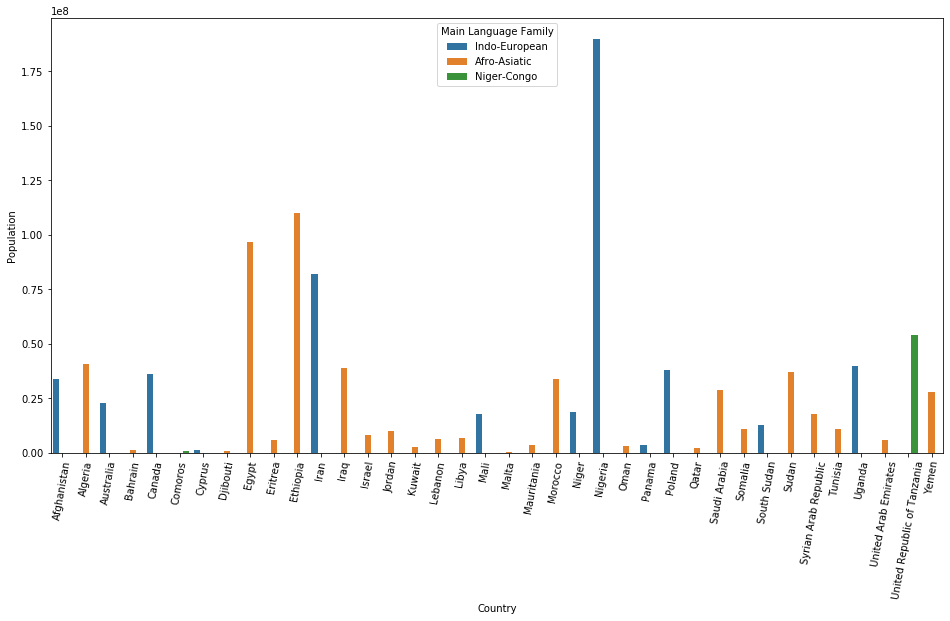

In [199]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data = aa, y='Population', x='Country',
            hue='Main Language Family', ax=ax)
plt.xticks(rotation=80)
# plt.savefig('countries_with_afro-asiatic_languages.png');

In [198]:
aa[aa['Country'] == 'United Republic of Tanzania']['Afro-Asiatic Languages']

183    Arabic
Name: Afro-Asiatic Languages, dtype: object